In [1]:
from sr760 import SR760
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

In [2]:
sa = SR760(visa_address='ASRL7::INSTR')

Connected to device with ID: Stanford_Research_Systems,SR760,s/n41539,ver139


In [ ]:
# trace = pd.read_csv('hp_test.csv')
# dBm = trace['level_list']
# dBV = dBm - 30 + 10*np.log10(50)
# dBV_per_sqrtHz = dBV - 10*np.log10(10)
# trace['level_list'] = dBV_per_sqrtHz

In [6]:
trace = pd.DataFrame(sa.get_trace(trace_label=1))

In [7]:
trace = trace[trace['freq_list']!=0.0]

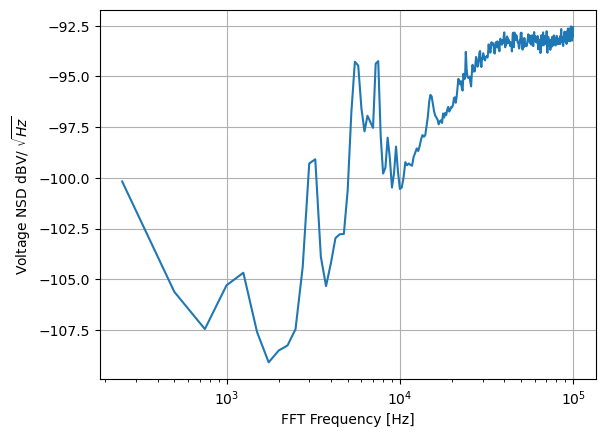

In [8]:
plt.semilogx(trace['freq_list'], trace['level_list'])
plt.xlabel('FFT Frequency [Hz]')
plt.ylabel(r'Voltage NSD dBV/ $\sqrt{Hz}$')
plt.grid()

In [13]:
def beta_line(f):
    return 8*np.log(2)*f/np.pi**2

In [14]:
kappa = 8.6e6/(.645)
freq = trace['freq_list']
freq_psd = (10**(trace['level_list']/20) * kappa )**2
psd_spline = lambda xx : np.interp(xx, freq, freq_psd)
def psd_diff(f):
    return np.abs(psd_spline(f) - beta_line(f))

f_intersect = sp.optimize.minimize_scalar(psd_diff, bounds = [20,45])['x']

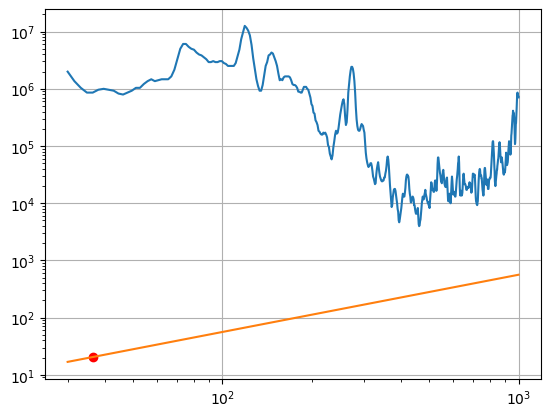

In [15]:
plt.loglog(freq, freq_psd)
plt.loglog(freq,beta_line(freq))
plt.grid(True)
plt.scatter(f_intersect, beta_line(f_intersect), c='red')

In [23]:
f_intersect

31.249999328136873

In [24]:
np.sqrt(8*np.log(2)*sp.integrate.quad(psd_spline, 1/(32e-3), f_intersect)[0])

C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_16052\3330618718.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(8*np.log(2)*sp.integrate.quad(psd_spline, 1/(32e-3), f_intersect)[0])


nan